## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [1]:
import pandas as pd
dataset = pd.read_csv('titanic.csv')

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

Обчислення відсотку виживання серед чоловіків

In [2]:
men_survived = dataset[(dataset['Sex'] == 'male') & (dataset['Survived'] == 1)]
men_total = dataset[dataset['Sex'] == 'male']
men_survival_rate = (len(men_survived) / len(men_total)) * 100

Обчислення відсотку виживання серед жінок

In [3]:
women_survived = dataset[(dataset['Sex'] == 'female') & (dataset['Survived'] == 1)]
women_total = dataset[dataset['Sex'] == 'female']
women_survival_rate = (len(women_survived) / len(women_total)) * 100

Виведення результатів

In [4]:
print("Відсоток виживання серед чоловіків:", men_survival_rate, "%")
print("Відсоток виживання серед жінок:", women_survival_rate, "%")

Відсоток виживання серед чоловіків: 18.890814558058924 %
Відсоток виживання серед жінок: 74.20382165605095 %


**Задача 2:** Відтворіть ці графіки (тут не поділено на стать, 1-виживші)  
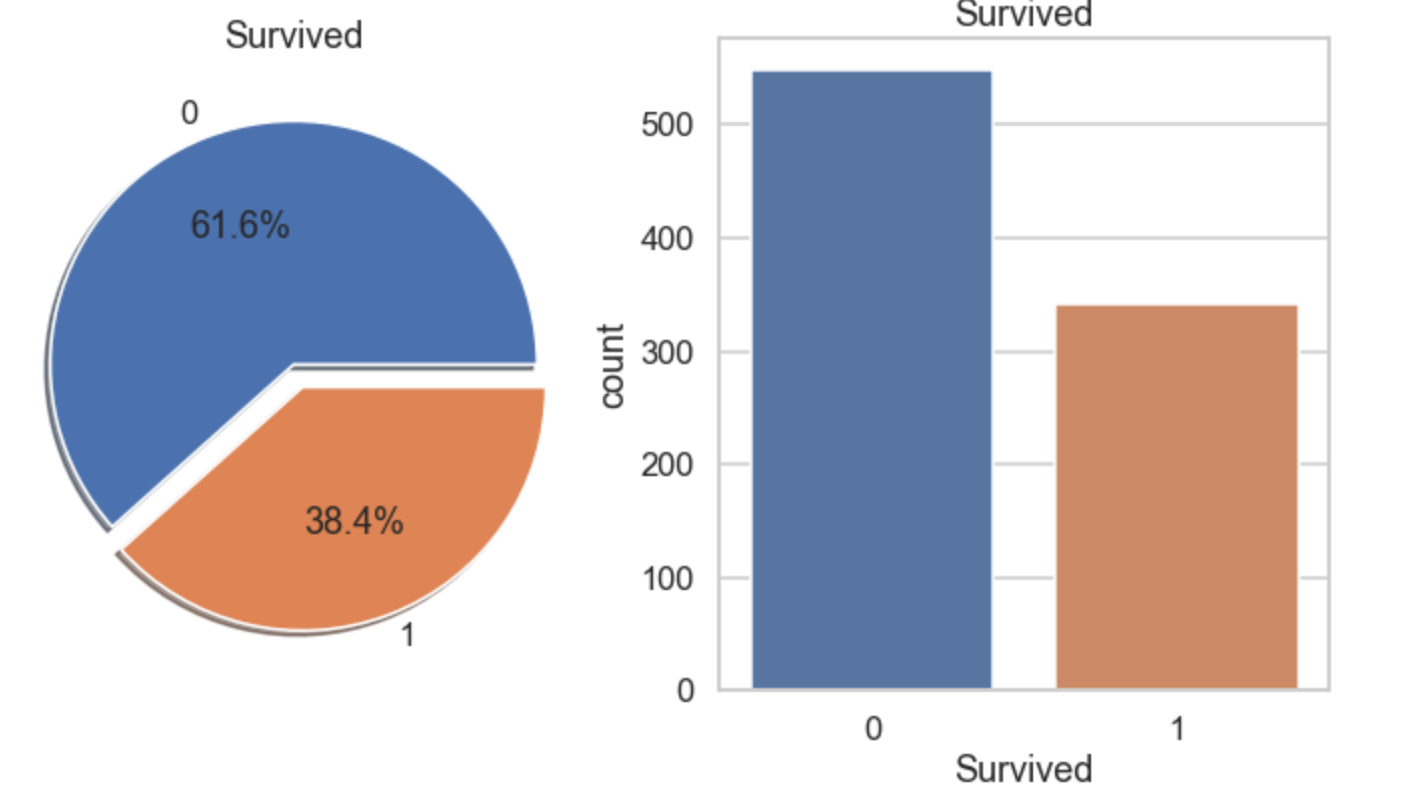


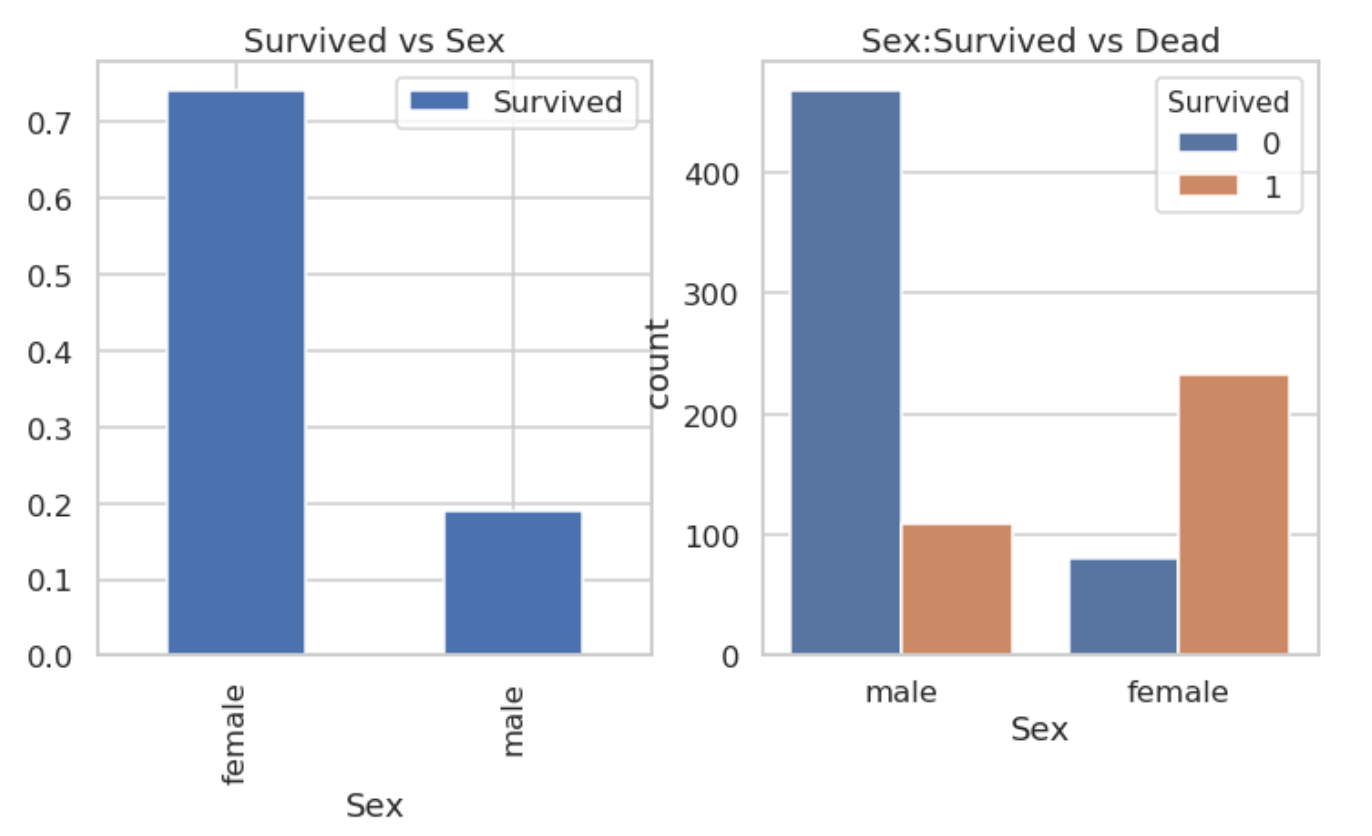

Побудова графіка 1

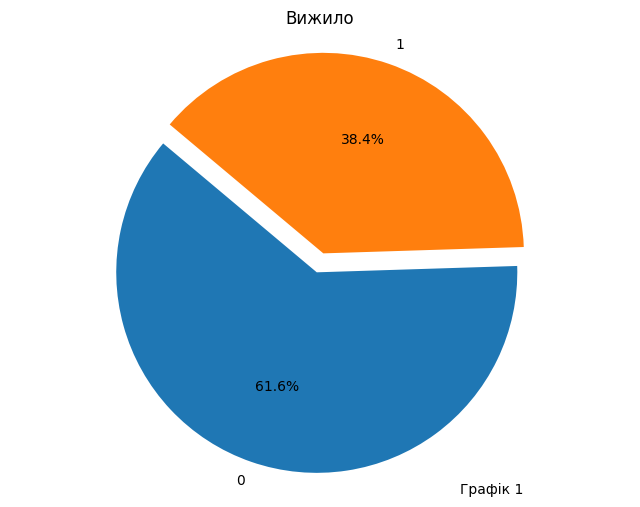

In [5]:
import matplotlib.pyplot as plt

survivors_count = dataset['Survived'].value_counts()

explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(survivors_count, labels=['0', '1'], autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Вижило')
plt.axis('equal')
plt.text(1, -1.2, 'Графік 1', fontsize=10, ha='right')
plt.show()



На графіку 1 зображено розподіл виживання пасажирів, де 1 і 0 означають виживші і загиблі відповідно. За допомогою діаграми можна побачити що відсоток загиблих значено більший

Побудова графіка 2

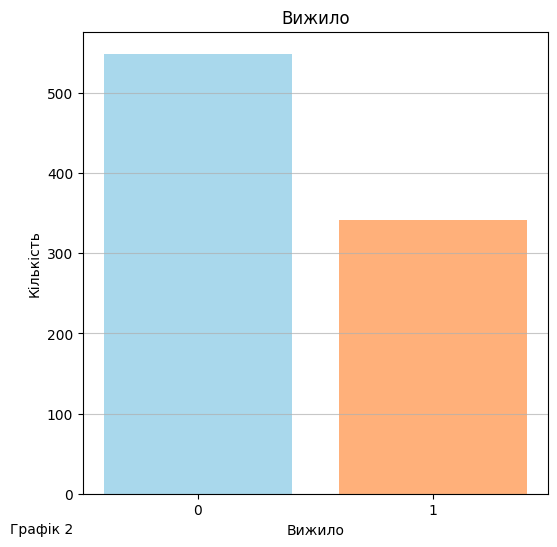

In [6]:
import matplotlib.pyplot as plt

survivors_count = dataset['Survived'].value_counts()

pastel_blue = '#A9D8EC'
pastel_orange = '#FFB07A'

plt.figure(figsize=(6, 6))
plt.bar(survivors_count.index, survivors_count.values, color=[pastel_blue, pastel_orange])
plt.xticks(survivors_count.index, ['0', '1'])
plt.xlabel('Вижило')
plt.ylabel('Кількість')
plt.title('Вижило')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.text(-0.8, -50, 'Графік 2', fontsize=10, ha='left')

plt.show()


На графіку 2 зображена гістограма порівняння кількості виживших (1) і загиблих (0) пасажирів. Звідси можна зробити висновок що кількість загиблих більша.

Побудова графіка 3

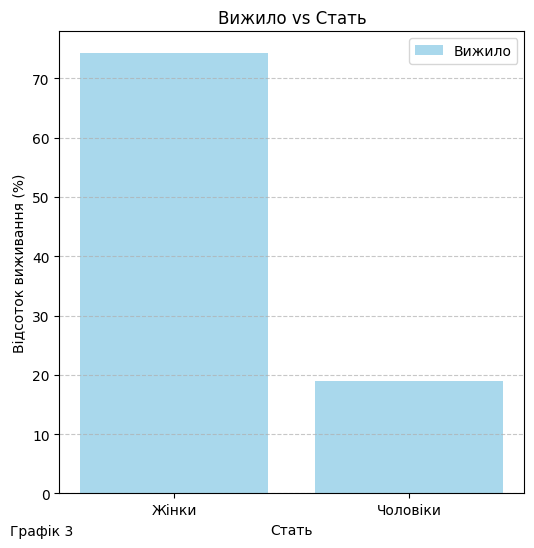

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
plt.bar(['Жінки', 'Чоловіки'], [women_survival_rate, men_survival_rate], color=pastel_blue)
plt.xlabel('Стать')
plt.ylabel('Відсоток виживання (%)')
plt.title('Вижило vs Стать')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text(-0.7, -7, 'Графік 3', fontsize=10, ha='left')
plt.legend(labels=['Вижило'])

plt.show()

На графіку 3 зображена гістограма порівняння відсотків виживших серед жінок та чоловіків. Відсоток виживших жінок набагато вищий ніж чоловіків.

Побудова графіка 4

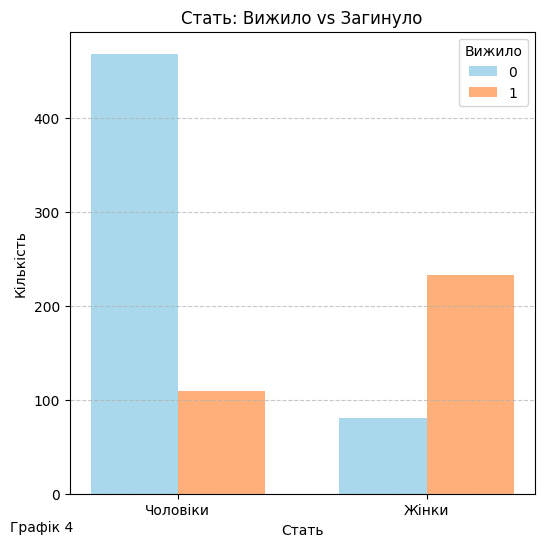

In [8]:
import matplotlib.pyplot as plt

labels = ['Чоловіки', 'Жінки']

deaths = [len(men_total) - len(men_survived), len(women_total) - len(women_survived)]
survived = [len(men_survived), len(women_survived)]

plt.figure(figsize=(6, 6))

bar_width = 0.35
index = range(len(labels))


plt.bar(index, deaths, bar_width, label='0', color=pastel_blue)
plt.bar([i + bar_width for i in index], survived, bar_width, label='1', color=pastel_orange)
plt.legend(title='Вижило', loc='upper right')

plt.xlabel('Стать')
plt.ylabel('Кількість')
plt.title('Стать: Вижило vs Загинуло')
plt.xticks([i + bar_width/2 for i in index], labels)
plt.text(-0.5, -40, 'Графік 4', fontsize=10, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


На графіку 4 зображена гістограма з показниками кількості загиблих і виживших серед чоловіків і жінок, де 0 і 1 означають загиблі і виживші відповідно. Звідси можна зробити висновок, що кількість загиблих серед чоловіків набагато більша ніж серед жінок, крім того, з виживших жінок більше ніж чоловіків.

Прокоментуйте побудовані графіки


**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

Кількість пропущених значень:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


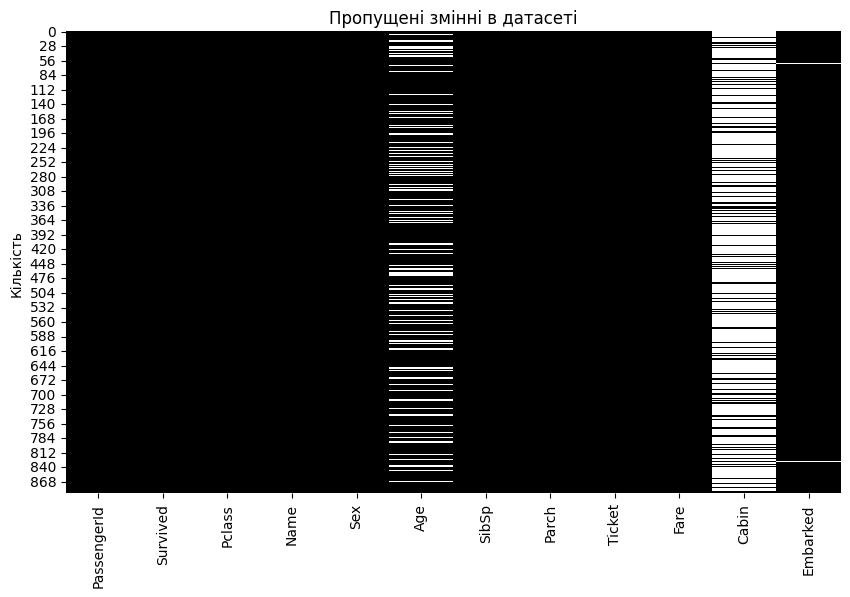

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = dataset.isnull().sum()

print("Кількість пропущених значень:")
print(missing_values)

plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cmap='binary_r', cbar=False)
plt.title('Пропущені змінні в датасеті')
plt.ylabel('Кількість')
plt.show()


На даному графіку можна побачити кількість пропущених значень для кожної змінної, загалом пропущені значення є в значенні Вік (Age), Каюта (Cabin) та Порт (Embarked)

**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

Вилучення частини імені, яка йде після префіксу 'Miss'

In [10]:
female_names = dataset[dataset['Sex'] == 'female']['Name'].str.extract(r'Miss\. ([A-Za-z]+)', expand=False)

Обчислення частоти появи кожного імені і пошук найбільш поширене

In [11]:
most_popular_name = female_names.value_counts().idxmax()

Виведення значення

In [12]:
print("Найпопулярніше жіноче ім'я на кораблі:", most_popular_name)

Найпопулярніше жіноче ім'я на кораблі: Anna


Звідси можна зробити висновок, що найпопулярнішим іменем серед жінок було Анна

**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

Вилучення частини імені, яка йде після префіксу 'Mr'

In [13]:
male_names = dataset[dataset['Sex'] == 'male']['Name'].str.extract(r'Mr\. ([A-Za-z]+)', expand=False)

Обчислення частоти появи кожного імені і пошук найбільш поширене

In [14]:
most_popular_name = male_names.value_counts().idxmax()

Виведення значення

In [15]:
print("Найпопулярніше чоловіче ім'я на кораблі:", most_popular_name)

Найпопулярніше чоловіче ім'я на кораблі: William


Звідси можна зробити висновок, що найпопулярнішим іменем серед чоловіків було Вільям

**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
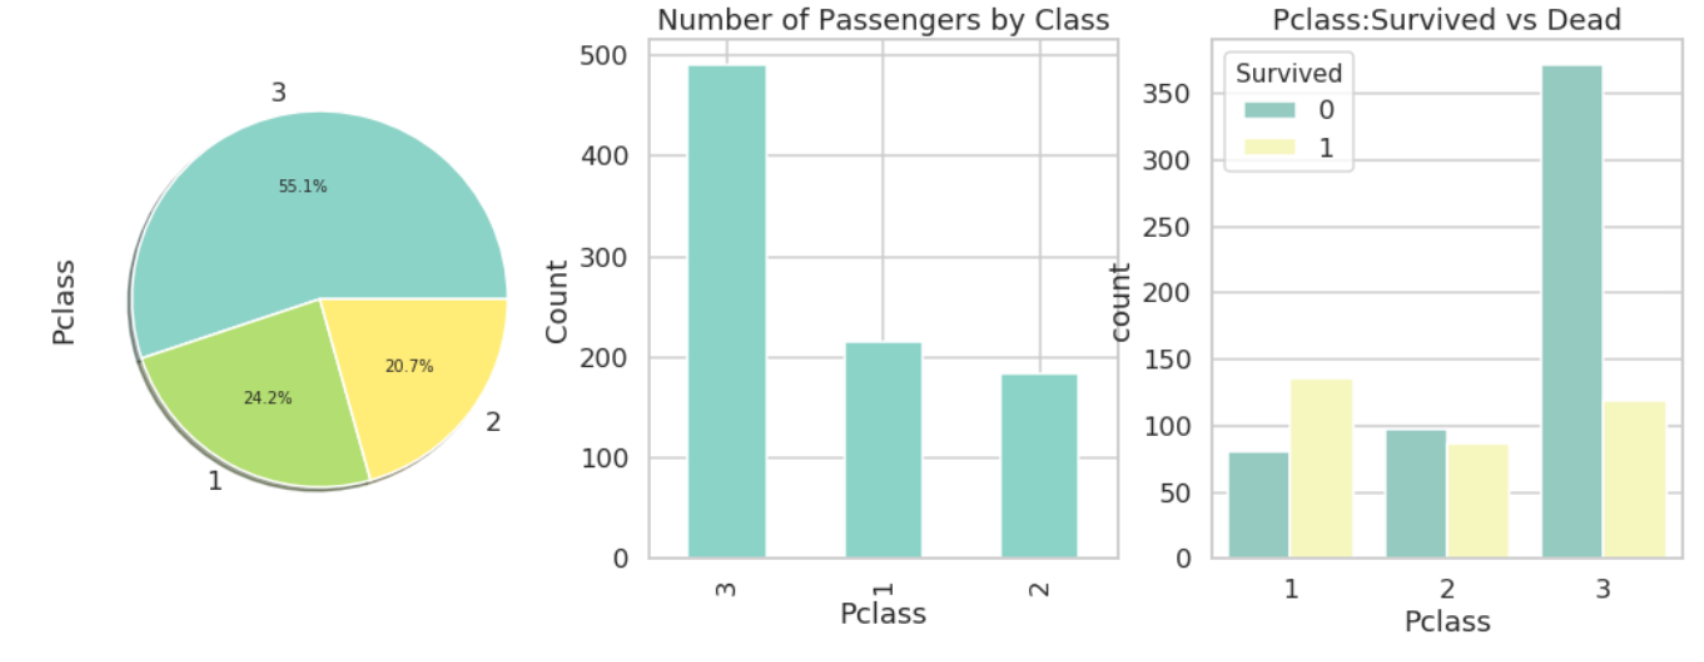

Побудова графіка 5

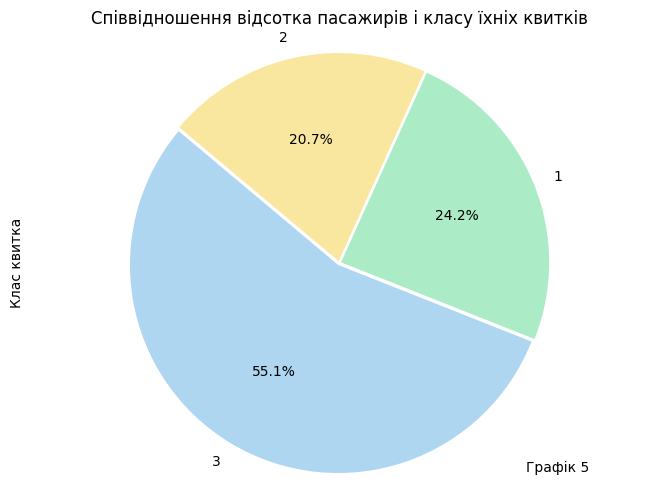

In [16]:
class_counts = dataset['Pclass'].value_counts()

explode = (0.01, 0.01, 0.01)

pastel_blue = '#AED6F1'
pastel_green = '#ABEBC6'
pastel_yellow = '#F9E79F'

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=[pastel_blue, pastel_green, pastel_yellow])
plt.title('Співвідношення відсотка пасажирів і класу їхніх квитків')
plt.text(1.2, -1, 'Графік 5', fontsize=10, ha='right')
plt.ylabel('Клас квитка')
plt.axis('equal')
plt.show()


На графіку 5 зображено співвідношення відсотка пасажирів і класу їхніх квитків. 1, 2 і 3 є позначенями 1 класу, 2 класу і 3 відповідно. Найбільший відсоток припадає на квитки 3 класу.

Побудова графіка 6

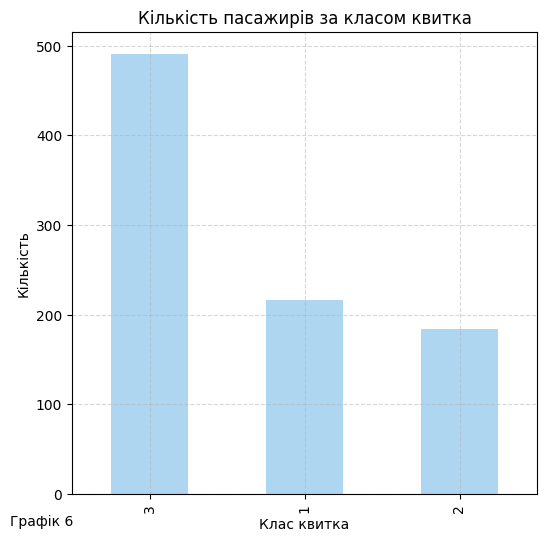

In [17]:
class_counts = dataset['Pclass'].value_counts()

class_counts_sorted = class_counts.sort_values(ascending=False)

plt.figure(figsize=(6, 6))
class_counts_sorted.plot(kind='bar', color=pastel_blue)
plt.title('Кількість пасажирів за класом квитка')
plt.xlabel('Клас квитка')
plt.ylabel('Кількість')
plt.xticks(rotation=90)
plt.text(-0.9, -35, 'Графік 6', fontsize=10, ha='left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


На графіку 6 зображено співвідношення кільксоті пасажирів до кількості квитків їхнього класу і розподілене в порядку спадання, тому звідси можна зробити висновок, що найбільша частина квитків належить третього класу, потім першого і другого.

Побудова графіка 7

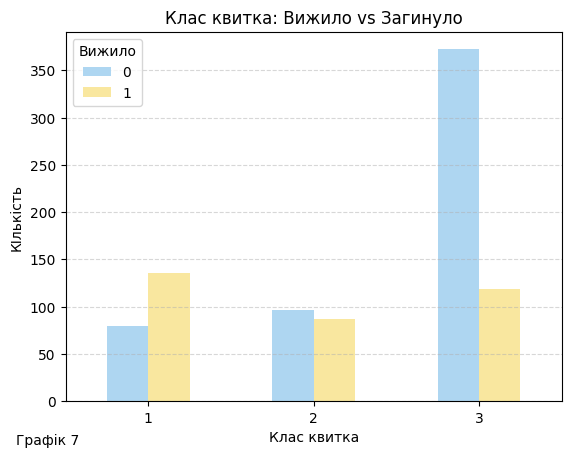

In [18]:
survived_counts = {}
not_survived_counts = {}

for pclass in class_counts.index:
    survived_counts[pclass] = dataset[(dataset['Pclass'] == pclass) & (dataset['Survived'] == 1)].shape[0]
    not_survived_counts[pclass] = dataset[(dataset['Pclass'] == pclass) & (dataset['Survived'] == 0)].shape[0]

survival_df = pd.DataFrame({'0': not_survived_counts, '1': survived_counts})

survival_df = survival_df.sort_index()

survival_df.plot(kind='bar', color=[pastel_blue, pastel_yellow])

plt.title('Клас квитка: Вижило vs Загинуло')
plt.xlabel('Клас квитка')
plt.ylabel('КІлькість')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Вижило', loc='upper left')
plt.text(-0.8, -45, 'Графік 7', fontsize=10, ha='left')

plt.show()


На графіку 7 зображено співвідношення кількості загиблих і виживших за класом їхнього квитка, найбільша кількість виживших серед власників квитка першого класу, найменша - другого. Найбільше загиблих серед власників квитка 3 класу, найменша - першого.

Прокоментуйте побудовані графіки

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
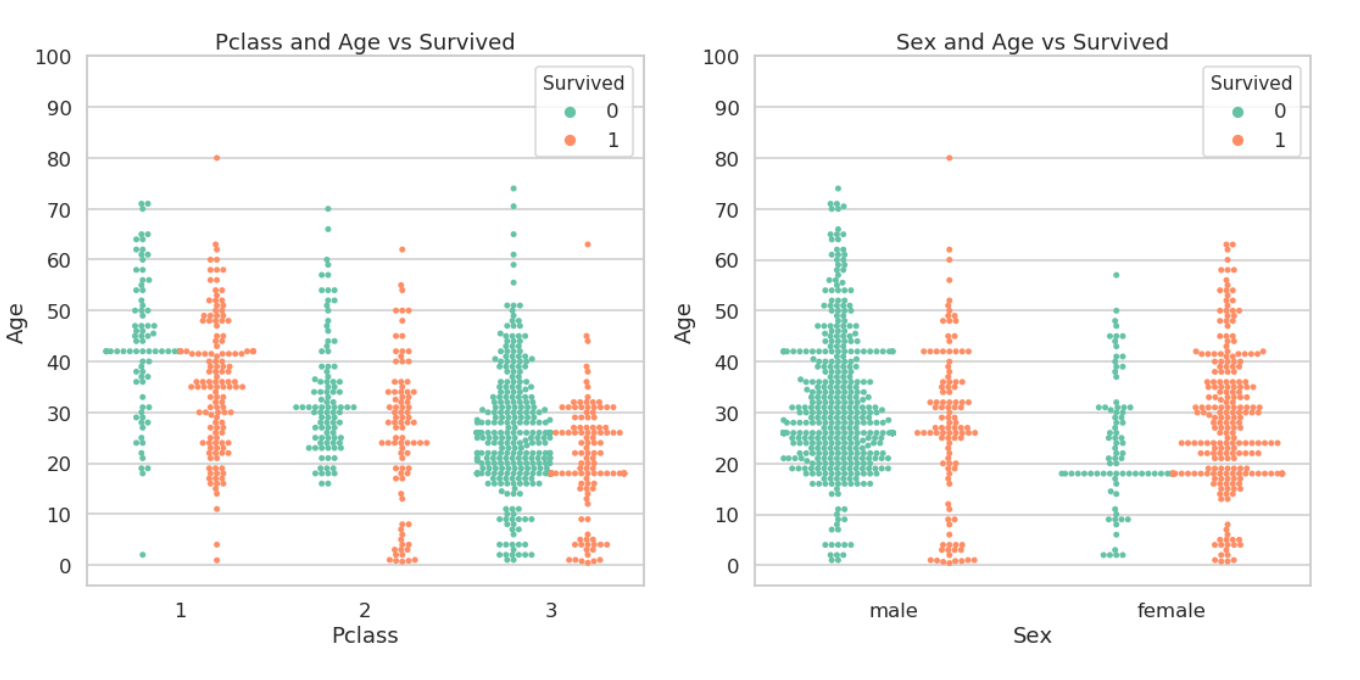![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

Побудова графіка 8

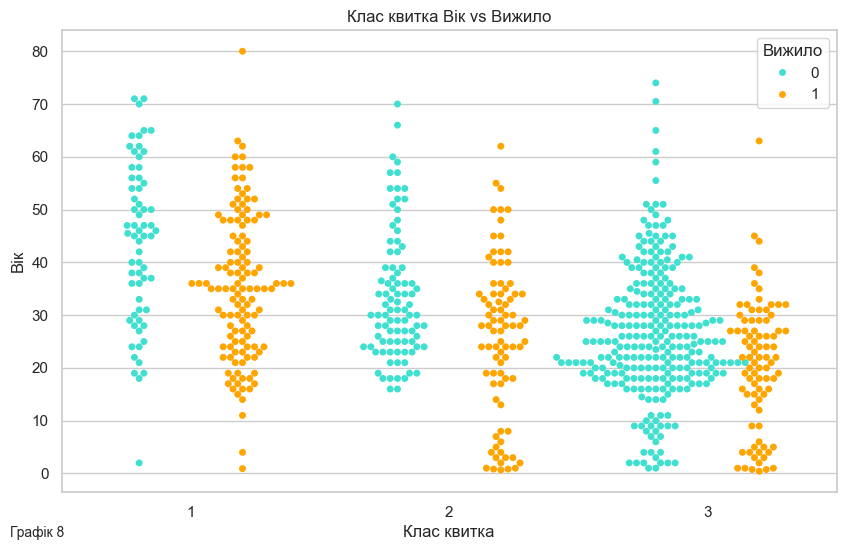

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=dataset, palette={0: 'turquoise', 1: 'orange'}, dodge=True)
plt.title('Клас квитка Вік vs Вижило')
plt.xlabel('Клас квитка')
plt.ylabel('Вік')
plt.legend(title='Вижило', loc='upper right')
plt.text(-0.7, -12, 'Графік 8', fontsize=10, ha='left')

plt.show()


На графіку 8 зображена діаграма розсіювання, яка відображає вік виживших (1) і загиблих (0) власників квитків першого, другого та третього класів. Власники квитків третього класу переважно були молодими і середнього віку. Власниками квитків першого класу переважно були пасажири середнього віку і вище.

Побудова графіка 9

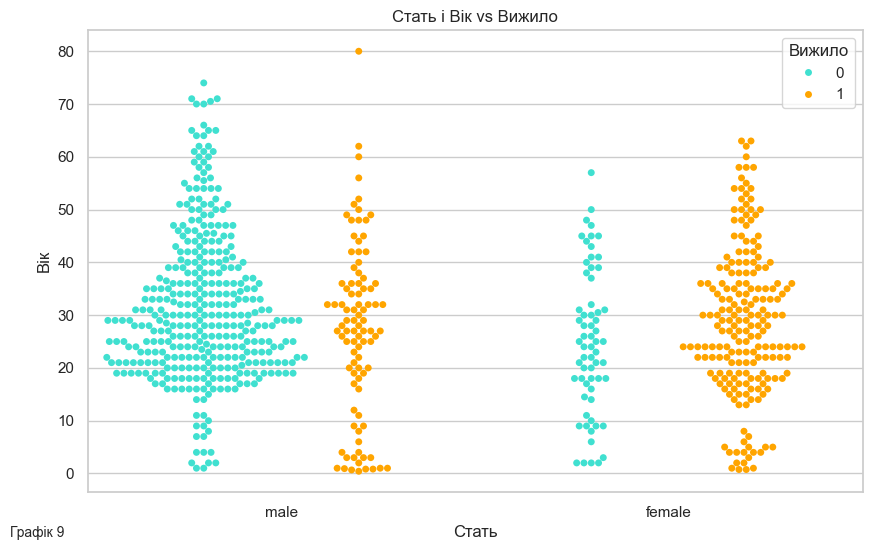

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Sex', y='Age', hue='Survived', data=dataset, palette={0: 'turquoise', 1: 'orange'}, dodge=True)
plt.title('Стать і Вік vs Вижило')
plt.xlabel('Стать')
plt.ylabel('Вік')
plt.legend(title='Вижило', loc='upper right')
plt.text(-0.7, -12, 'Графік 9', fontsize=10, ha='left')

plt.show()


На графіку 9 зображена діаграма розсіювання, яка відображає вік виживших (1) і загиблих (0) чоловіків (male) і жінок (female). Найбільше загинуло чоловіків віком приблизно 20-45 років, жінок - 18-30 років. Серед виживших чоловіків найбільше вижило дітей та осіб середнього віку, жінок - дітей та осіб віком приблизно 20-40 років.

Прокоментуйте побудовані графіки

**Задача 8** Побудуйте наступні діаграми розподілів:  

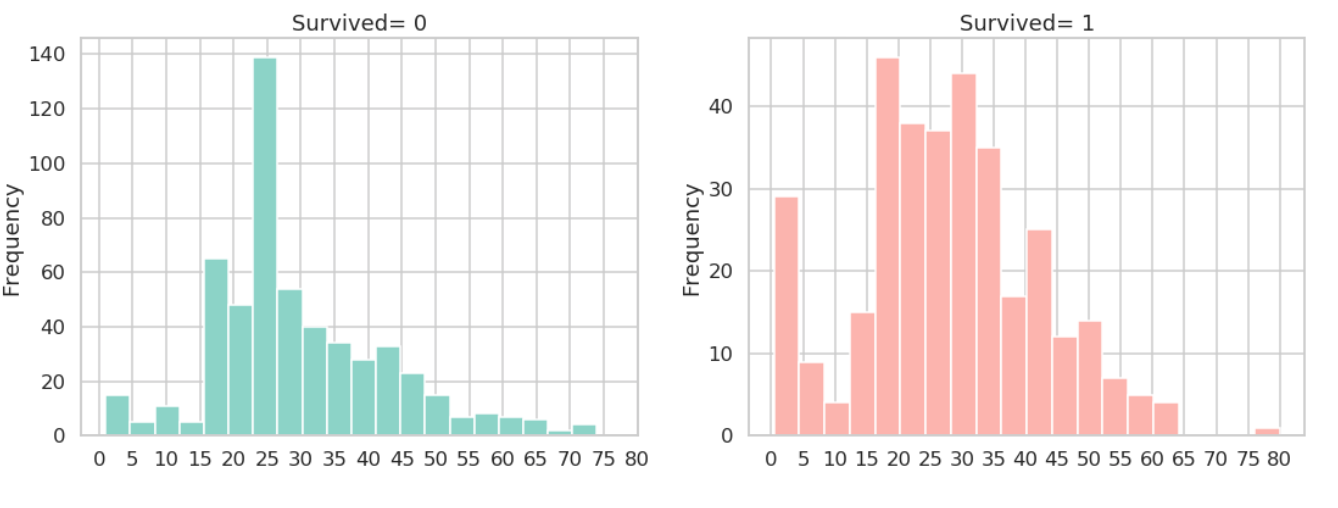



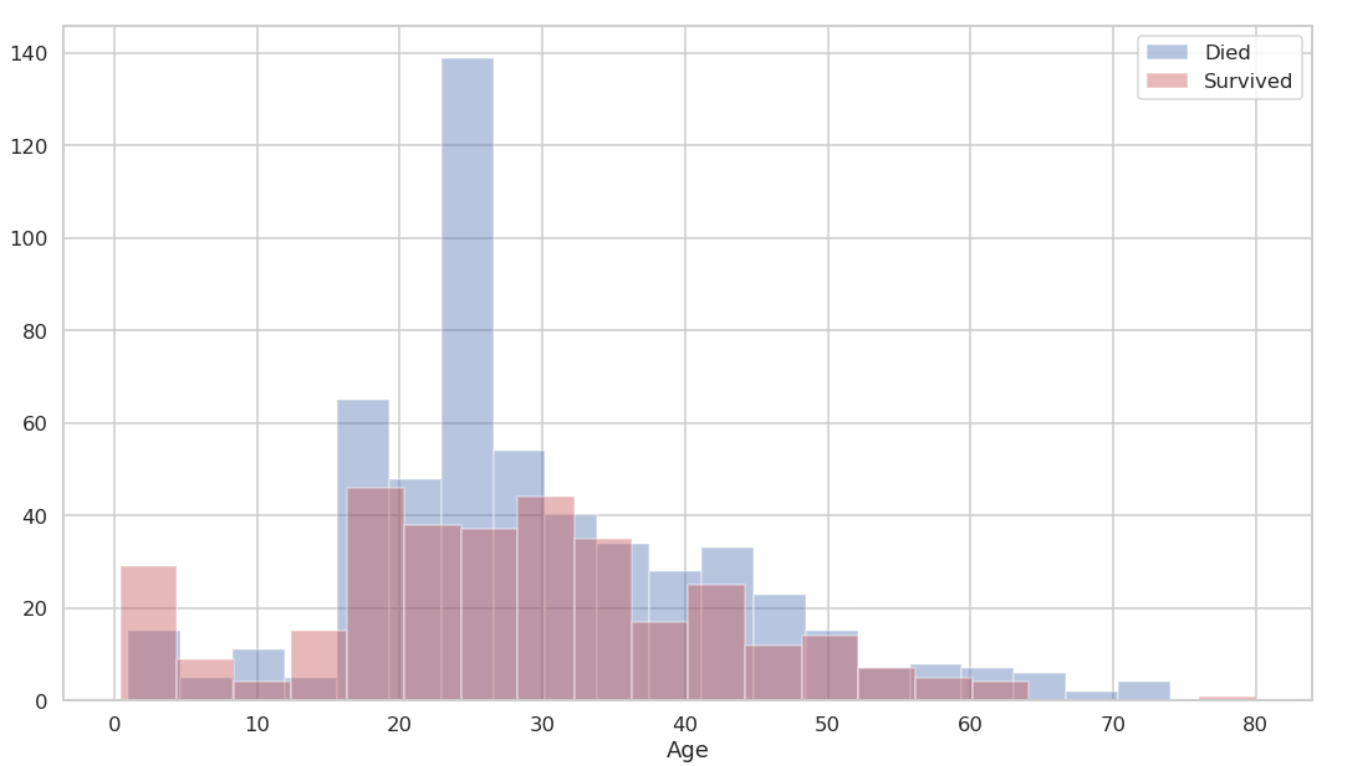

Побудова графіка 10

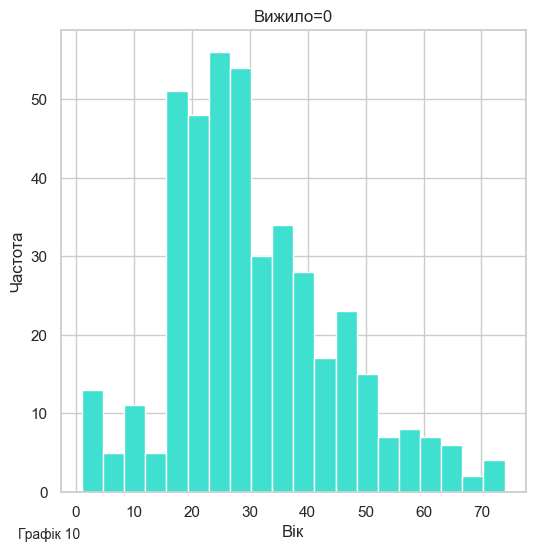

In [21]:
deceased = dataset[dataset['Survived'] == 0]

plt.figure(figsize=(6, 6))
plt.hist(deceased['Age'], bins=20, color='turquoise', edgecolor='white')
plt.title('Вижило=0')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.text(-10, -6, 'Графік 10', fontsize=10, ha='left')

plt.show()


На графіку 10 зображена діаграма розподілу кількості загиблих пасажирів і їхнього віку. Найбільше загинуло пасажирів віком 20-30 років.

Побудова графіка 11

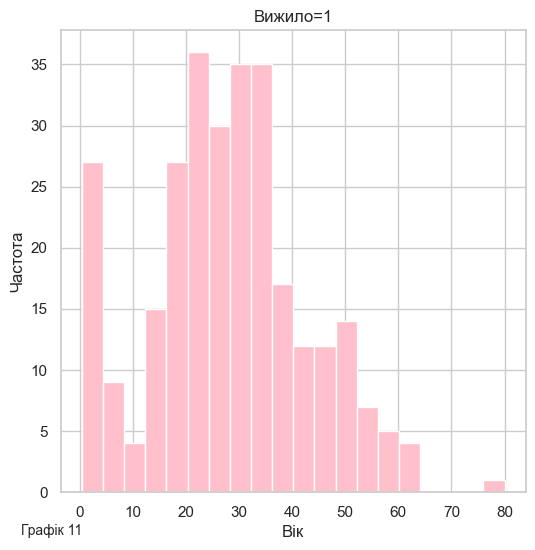

In [22]:
survived = dataset[dataset['Survived'] == 1]

plt.figure(figsize=(6, 6))
plt.hist(survived['Age'], bins=20, color='pink', edgecolor='white')
plt.title('Вижило=1')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.text(-11, -3.5, 'Графік 11', fontsize=10, ha='left')

plt.show()


На графіку 11 зображена діаграма розподілу кількості вижвиших пасажирів і їхнього віку. Найбільше вижило дітей і пасажирів віком 20-35 років.

Побудова графіка 12

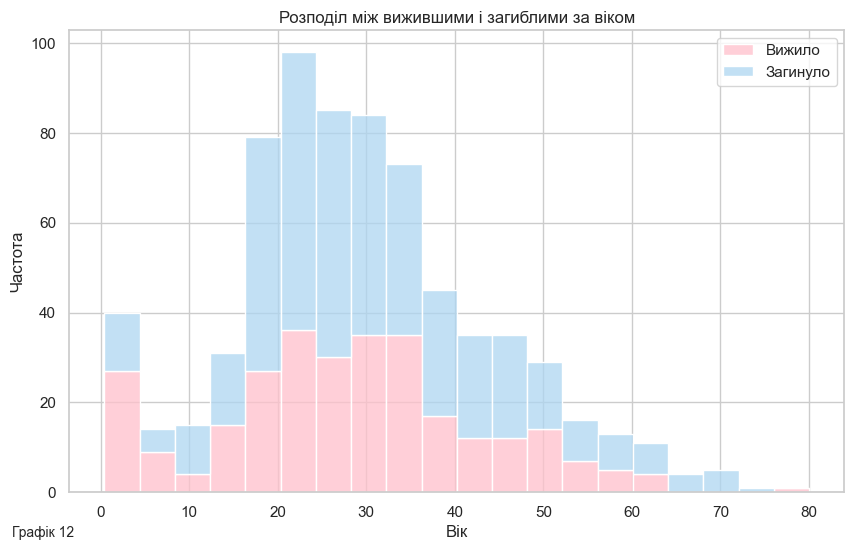

In [23]:
plt.figure(figsize=(10, 6))

sns.histplot(data=dataset, x='Age', hue='Survived', bins=20, palette={0: pastel_blue, 1: 'pink'}, edgecolor='white', multiple='stack')
plt.title('Розподіл між вижившими і загиблими за віком')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.legend(labels=['Вижило', 'Загинуло'])
plt.text(-10, -10, 'Графік 12', fontsize=10, ha='left')

plt.show()


На графіку 12 зображена діаграма розподілу виживших і загиблих пасажирів за віком, найбільше смертей припадає на вік 20-35 років, найбільше виживших - діти і особи віком 20-35 років.

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


-Побудова розподілів змінних допомагає зібрати та відобразити конкретну інформацію, а для статичних оцінок необхідні доповнення (підписи, легенда), інакше неможливо буде зрозуміти, що саме піддається аналізу.

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
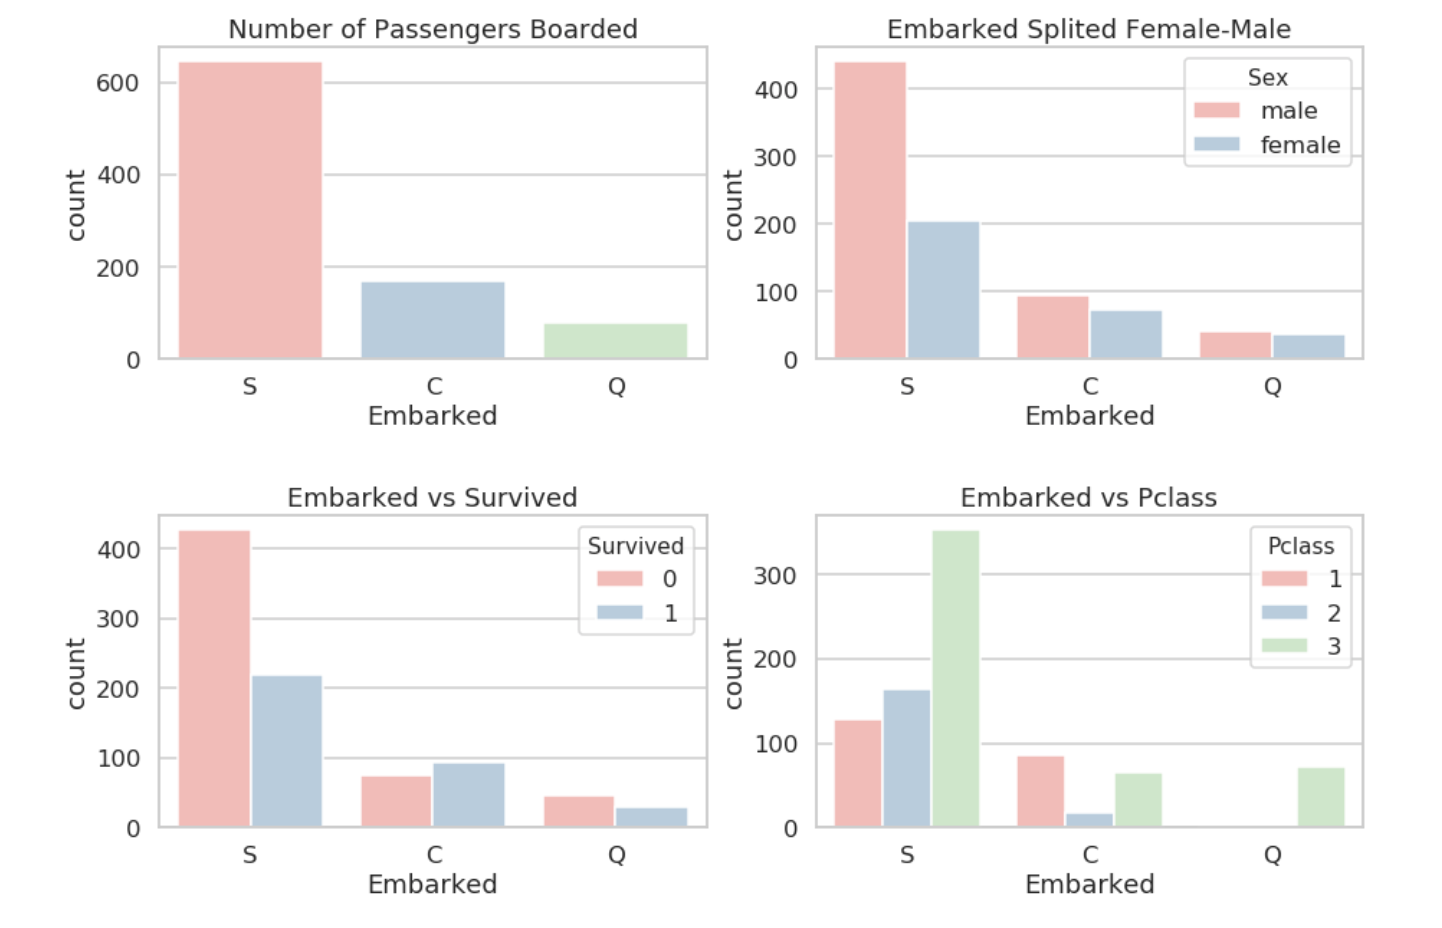

Побудова графіка 13

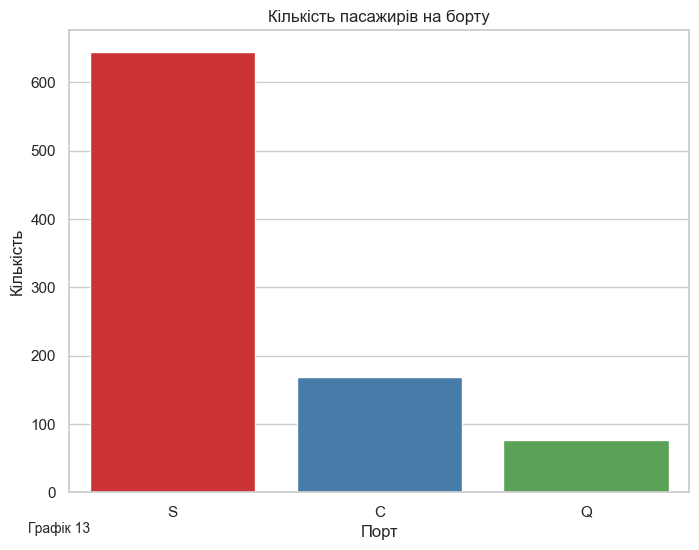

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Embarked', palette='Set1', hue='Embarked', legend=False)
plt.title('Кількість пасажирів на борту')
plt.xlabel('Порт')
plt.ylabel('Кількість')
plt.text(-0.7, -60, 'Графік 13', fontsize=10, ha='left')

plt.show()


На графіку 13 зображена діаграма розподілу загальної кількості пасажирів і місця їхньої посадки, значна більшість пасажирів здійснила посадку в порту 'S', найменша - 'Q'

Побудова графіка 14

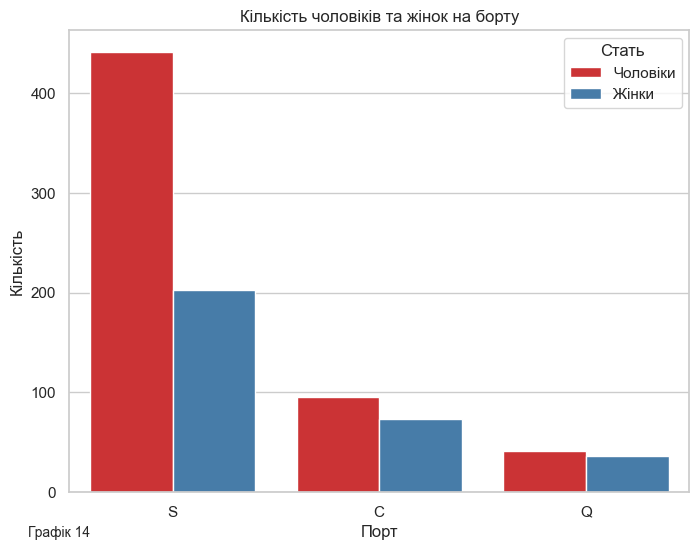

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Embarked', hue='Sex', palette='Set1')
plt.legend(title='Стать', loc='upper right', labels=['Чоловіки','Жінки'])
plt.title('Кількість чоловіків та жінок на борту')
plt.xlabel('Порт')
plt.ylabel('Кількість')
plt.text(-0.7, -45, 'Графік 14', fontsize=10, ha='left')

plt.show()


На графіку 14 зображена діаграма розподілу кількості пасажирів чоловічої та жіночої статі на борту і місце їхньої посадки. Значна більшість чоловіків здійснила посадку в порту 'S', найменша - 'Q'. З жінками ситуація аналогічна.

Побудова графіка 15

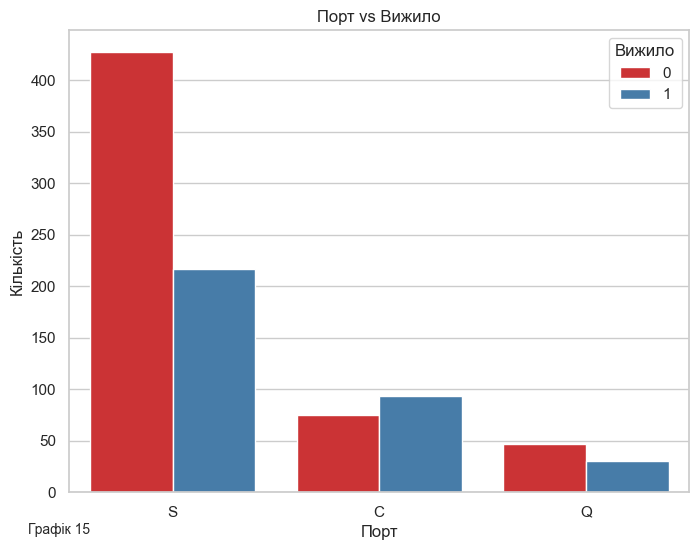

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Embarked', hue='Survived', palette='Set1')
plt.legend(title='Вижило', loc='upper right')
plt.title('Порт vs Вижило')
plt.xlabel('Порт')
plt.ylabel('Кількість')
plt.text(-0.7, -40, 'Графік 15', fontsize=10, ha='left')

plt.show()


На графіку 15 зображена діаграма розподілу місця посадки і кількості загиблих/виживших пасажирів. Третина пасажирів, які здійснили посадку в порту 'S' і 'Q', вижили. Більшість пасажирів з порту 'C' вижила.

Побудова графіка 16

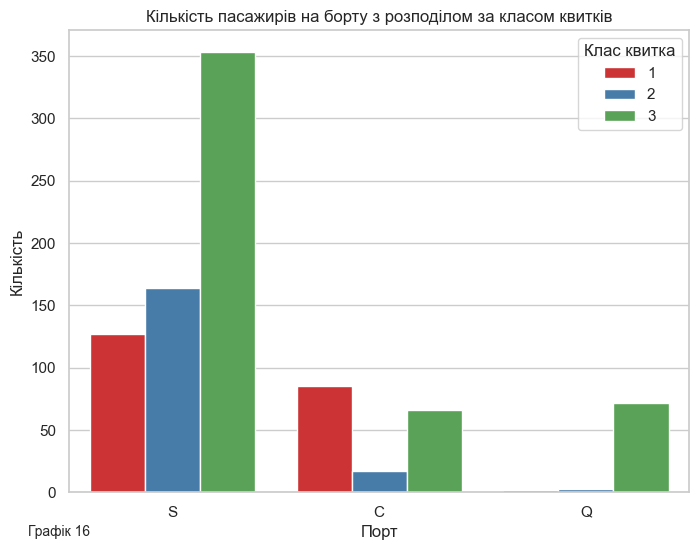

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create a bar plot of the total number of passengers embarked at each port, divided by ticket class
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Embarked', palette='Set1', hue='Pclass')
plt.legend(title='Клас квитка', loc='upper right')
plt.title('Кількість пасажирів на борту з розподілом за класом квитків')
plt.xlabel('Порт')
plt.ylabel('Кількість')
plt.text(-0.7, -35, 'Графік 16', fontsize=10, ha='left')

plt.show()


На графіку 16 зображена діаграма розподілу кількості пасажирів із різних портів і класу їхнього квитка. Більшість пасажирів здійснила посадку в порту 'S', Більшість власників квитка першого класк здійснила посадку в порту 'S' і 'C', другого класу - 'S', найменше в порту 'Q', третього - 'S', нацменше в порту 'C'.

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

Побудова графіка 17

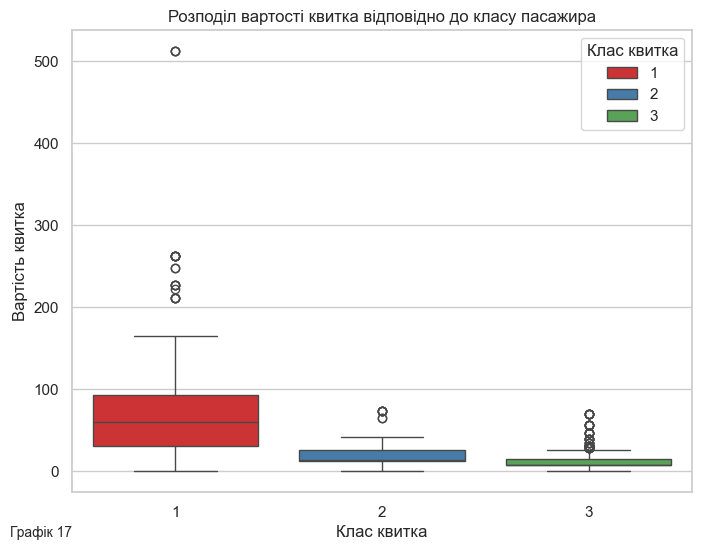

In [28]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Pclass', y='Fare', palette='Set1', hue='Pclass')
plt.title('Розподіл вартості квитка відповідно до класу пасажира')
plt.xlabel('Клас квитка')
plt.ylabel('Вартість квитка')
plt.legend(title='Клас квитка', loc='upper right')
plt.text(-0.8, -80, 'Графік 17', fontsize=10, ha='left')

plt.show()


На графіку 17 зображена діаграма розподілу вартості квитка відповідно до класу пасажира. Найдорожчими були квитки першого класу, вартість яких для декількох пасажирів складала вище 200 гр.од. Для більшості пасажирів другого та третього класу вартість була менше 50 гр. од., окрім деяких винятків, вартість для яких складала більше 50 гр. од.

Прокоментуйте побудовані графіки